## Hotel Bookings and Cancelations

 In this report I will be going over the demand for hotel bookings and how one can predict guest cancellations due to different variables such as room rates, busy months, and length of visits. 

In [2]:
# First I will import needed packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# I will check my current directory with the use of os
import os
os.getcwd()

'C:\\Users\\Robyn\\DSC680\\Hotel_Booking_Project'

The data set that I will be utilizing contains data for a resort hotel and a city hotel. The data set also includes 31 other variables that can be seen below in the data frame.

In [4]:
# I will now pull my data set through pd to create a data frame
Hotel_Bookings = pd.read_csv("\\Users\\Robyn\\DSC680\\Hotel_Booking_Project\\hotel_bookings.csv")
Hotel_Bookings

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017


## Variable Description

•	Is_Canceled – Indicates if the booking has been canceled or not with a (1) for cancelled and (0) if not.

•	Lead_Time – Indicates the number of days that elapsed between the entering date of the booking into the PMS and arrival date.

•	Arrival_Date_Year – Indicates the arrival date

•	Arrival_Date_Month – Indicates the month of the arrival date.

•	Arrival_Date_Week_Month – Indicates the week number of year for the arrival date

•	Arrival_Date_Day_Of_Month – Indicates the day of arrival

•	Stays_In_Weekend_Nights – Indicates the number of weekend nights such as Saturday and Sunday the guest will be staying or booked to stay at the hotel

•	Stays_In_Week_Nights – Indicates the number of week nights such as Monday through Friday the guests will be staying or have booked to stay at the hotel.

•	Adults – Indicates the number of adults

•	Children - Indicates the number of children

•	Babies - Indicates the number of babies

•	Meal – Indicates the type of meal booked. These categories include standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

•	Country – Indicates the country of origin

•	Market_Segment – Indicates the market segment designation such as the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

•	Distribution_Channel – Indicates the booking distribution channel such as the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

•	Is_Repeated_Guest – Indicates the value indicating if the booking name was from a repeated guest is (1) and (0) if not

•	Previous_Cancellations – Indicates the number of previous bookings that were cancelled by the customer prior to the current booking.

•	Previous_Bookings_Not_Cancelled – Indicates the Number of previous bookings not cancelled by the customer prior to the current booking.

•	Reserved_Room_Type – Indicates the Code of room type reserved. Code is presented instead of designation for anonymity reasons.

•	Assigned_Room_Type – Indicates the Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (such as overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

•	Booking_Changes – Indicates the Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.

•	Deposit_Type – Indicates the Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: 

   1. No Deposit – no deposit was made

   2. Non Refund – a deposit was made in the value of the total stay cost

   3. Refundable – a deposit was made with a value under the total cost of stay

•	Agent – Indicates the ID of the travel agency that made the booking.

•	Company – Indicates the ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

•	Days_In_Waiting_List – Indicates the Number of days the booking was in the waiting list before it was confirmed to the customer.

•	Customer_Type – Indicates the Type of booking, assuming one of four categories:

   1. Contract - when the booking has an allotment or other type of contract associated to it

   2. Group – when the booking is associated to a group 

   3. Transient – when the booking is not part of a group or contract, and is not associated to other transient booking

   4. Transient-party – when the booking is transient, but is associated to at least other transient booking

•	ADR – Indicates the Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

•	Required_Car_Parking_Spaces – Indicates the Number of car parking spaces required by the customer

•	Total_Of_Special_Requests – Indicates the Number of special requests made by the customer (such as twin bed or high floor)


In [5]:
# Use describe to see different statistics for the data set
Hotel_Bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
# Next I will view the shape of the data frame
Hotel_Bookings.shape

(119390, 32)

In [7]:
# I will now use isnull and sum to check for missing data
Hotel_Bookings.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### View variables with missing values

In [8]:
# View how many unique values the country variable has
Hotel_Bookings['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [9]:
# View how many unique values the agent variable has
Hotel_Bookings['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [10]:
# View how many unique values the company variable has
Hotel_Bookings['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [11]:
# View how many unique values the children variable has
Hotel_Bookings['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

## Determine to either drop values or uneeded columns.

I will first take care of the children variable that has four missing values. That will be filled with 0 as if they did not indicate they had children then we will go with no children being that it is only four missing values.

In [12]:
# I will use fillna to fill the missing values from the children variable with o 
Hotel_Bookings['children'] = Hotel_Bookings['children'].fillna(0)

I will now drop agent and company as these values will not be needed for my analysis.

In [13]:
# I will use drop to remove my agent and company variables
Hotel_Bookings=Hotel_Bookings.drop(['agent','company'],axis=1)

Being that the data frame has 119,390 rows of values and the Country variable is only missing 488 values I will be dropping the Na values.

In [14]:
# I will use dropna to remove the remaining values na values
Hotel_Bookings = Hotel_Bookings.dropna(axis = 0)

In [15]:
# I will now use isnull and sum to check and make sure all missing values have been filled or removed
Hotel_Bookings.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [16]:
# I will now view the data frame
Hotel_Bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [17]:
# I also noticed that somes stays had zero guests spanning from adults, children, and babies.I will use 
# drop to drop the values that are empty.
Empty = list(Hotel_Bookings.loc[Hotel_Bookings["adults"]+ Hotel_Bookings["children"]+ Hotel_Bookings["babies"]==0].index)
Hotel_Bookings.drop(Hotel_Bookings.index[Empty], inplace=True)

In [18]:
# Next I will view the shape of the data frame to see the difference
Hotel_Bookings.shape

(118732, 30)

## Converting datatypes

In [19]:
# I will now convert data my datatypes to strings
Hotel_Bookings['is_repeated_guest'] = Hotel_Bookings['is_repeated_guest'].astype('str')
Hotel_Bookings['is_canceled'] = Hotel_Bookings['is_canceled'].astype('str')
Hotel_Bookings['arrival_date_day_of_month'] = Hotel_Bookings['arrival_date_day_of_month'].astype('str')
Hotel_Bookings['arrival_date_year'] = Hotel_Bookings['arrival_date_year'].astype('str')
Hotel_Bookings['arrival_date_month'] = Hotel_Bookings['arrival_date_month'].astype('str')

In [20]:
# Next I will convert the arrival date to be set up in date and time
Hotel_Bookings['Arrival_Date'] = Hotel_Bookings['arrival_date_day_of_month'] + '-' + Hotel_Bookings['arrival_date_month'] + '-' + Hotel_Bookings['arrival_date_year']
Hotel_Bookings['Arrival_Date'] = pd.to_datetime(Hotel_Bookings['Arrival_Date'], errors='coerce')

In [21]:
# I will now create a value that shows the bookings confirmed 
bookings_confirm = Hotel_Bookings[Hotel_Bookings.is_canceled=='0']

In [22]:
# Next I will view the arrivals each month
import datetime as dt
bookings_confirm['ArrivingMonth'] = Hotel_Bookings['Arrival_Date'].dt.month
Monthly_Bookings=bookings_confirm['arrival_date_month'].value_counts().sort_index()
Monthly_Bookings

C:\Users\Robyn\anaconda3\envs\dsc650\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


April        6527
August       8609
December     4353
February     5308
January      4061
July         7880
June         6387
March        6566
May          7087
November     4617
October      6854
September    6356
Name: arrival_date_month, dtype: int64

Above we can see that the month with the most arrivals is August at 8609 and the month with the least arrivals is January with 4061

## EDA - Exploratory Data Analysis

In [23]:
# Import needed libraries
import pip
pip.main(['install','seaborn'])
import seaborn as sns

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


## What is the peak time for arrivals?

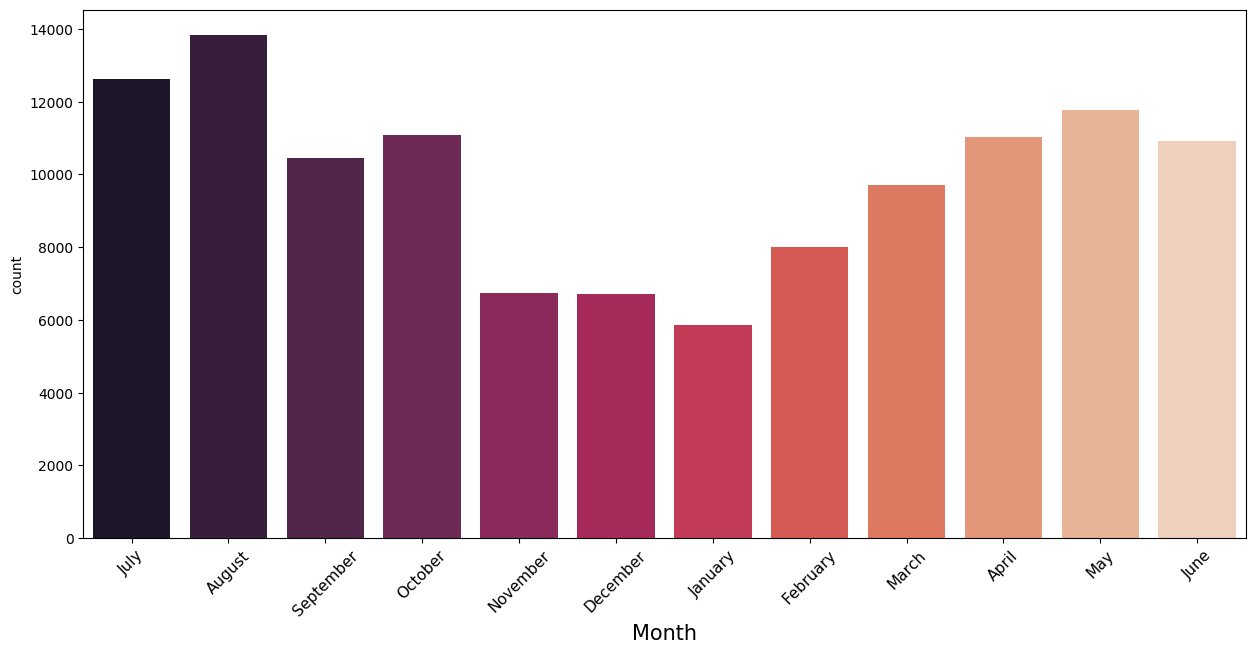

In [24]:
# lets us seaborn to see the arrivals by month
fig = plt.figure(figsize=(15,7), dpi = 100)
sns.countplot(data=Hotel_Bookings, x = 'arrival_date_month', palette = 'rocket')
plt.xlabel('Month', fontsize=15)
plt.xticks(rotation=45,fontsize=11);

The peak arrival month is august but we can see the lowest is january which makes sense due to the hollidays and most people trying to get back on a normal schedule after having time off work and school. While we can see a increase as the months go on then starts to drop in september when kids go back to school.

## What type of guests are checking into the hotels?

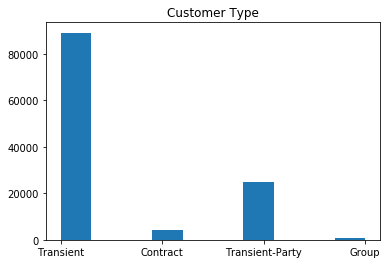

In [28]:
# Create a histogram that shows the customer type with plt
plt.hist(Hotel_Bookings['customer_type'])
plt.title("Customer Type")
plt.show()

Above we can see most guests are Transient guest and transient parties while groups is seen to be the lowest. 

## What method was taken to make a reservation?

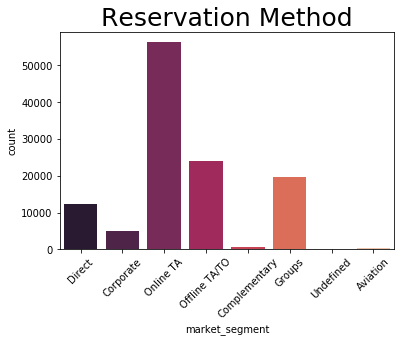

In [35]:
# I will create a seaborn plot to view the way guests create a reservation
plt.title("Reservation Method", fontdict = {'fontsize': 25})
sns.countplot(data=Hotel_Bookings, x= 'market_segment', palette = 'rocket')
plt.xticks(rotation=45,fontsize=10);

Above we can see that the highest count in reservation was done through a travel agent online. While direct reservations accounts for just over 10,000

### What is the ADR for first time guests and repeat guest by hotel?

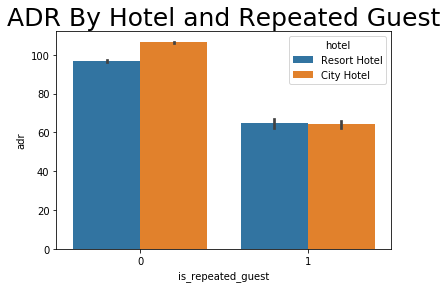

In [40]:
# I will create a bar plot that shows the adr for repeated guest and not and the two hotels 
plt.title("ADR By Hotel and Repeated Guest", fontdict = {'fontsize': 25})
sns.barplot(x='is_repeated_guest',y='adr', data=Hotel_Bookings, hue='hotel')
plt.show()

In an interesting finding we can see that first time guest are spending more to stay at either hotel. While repeat guest must be taking advantage of lower ADR that are avertised when coming back.

## What is the rate of cancelation and do repeated guests cancel their visit?

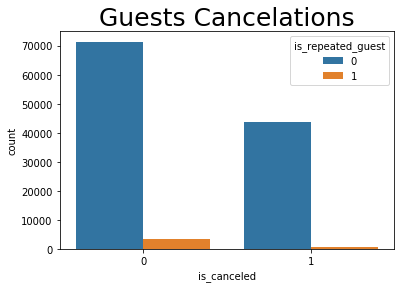

In [49]:
## I will create a plot using seaborn to determine if the guests cancelled or not
plt.title("Guests Cancelations", fontdict = {'fontsize': 25})
ax = sns.countplot(x = "is_canceled", hue = 'is_repeated_guest', data = Hotel_Bookings)
plt.show()

Above we can see that returning guests are not cancelling. While we also noticed that most guests are not repeating guests

## Which hotel see a higher rate of special requests?

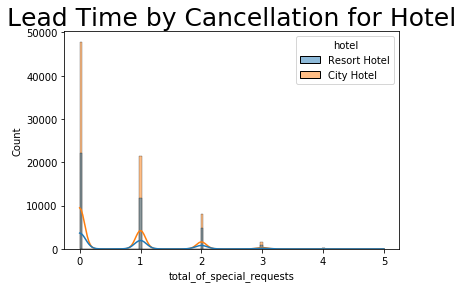

In [53]:
# I will use histplot to see the number of special requests by hotel
plt.title("Lead Time by Cancellation for Hotel", fontdict = {'fontsize':25})
sns.histplot(x='total_of_special_requests', data=Hotel_Bookings, kde=True, hue='hotel')
plt.show()

Above we can see that the city hotel has a larger amount of 1, 2, and 3, special requests while it looks like the resort hotel has gone up to five special requests.

## What type of Reservation Methods had the most Cancellations?

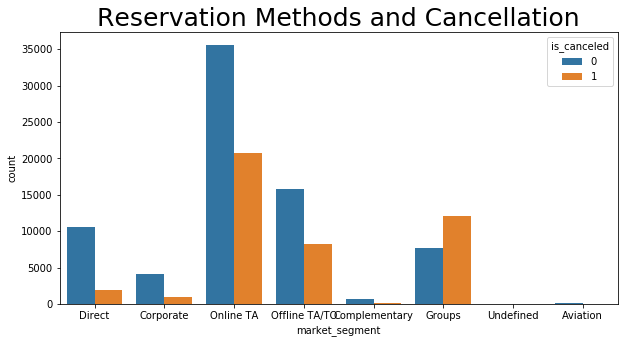

In [55]:
# I will now create a seaborn plot that shows the reservation method and cancellation rate
plt.figure(figsize = (10,5))
plt.title("Reservation Methods and Cancellation", fontdict = {'fontsize':25})
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = Hotel_Bookings)

Group reservations has the highest rate of cancellations coming in over 50% which is high but makes sense due to if a group cancelles that can consist of a large number of cancels. While Online travel agent reservation have an upwards of 40% canecelation rate. 

## Which hotel has the higher rate of bookings

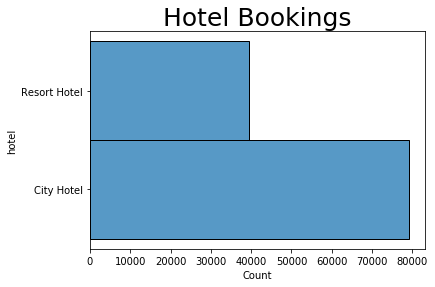

In [56]:
# Which hotel has the higher rate of reservations
plt.title("Hotel Bookings", fontdict = {'fontsize': 25})
sns.histplot(data=Hotel_Bookings, y="hotel")
plt.show()

Above we can see that hotel booking are higher for the City hotel instead of the resort hotel.

## What hotel has the higher rate per month?

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


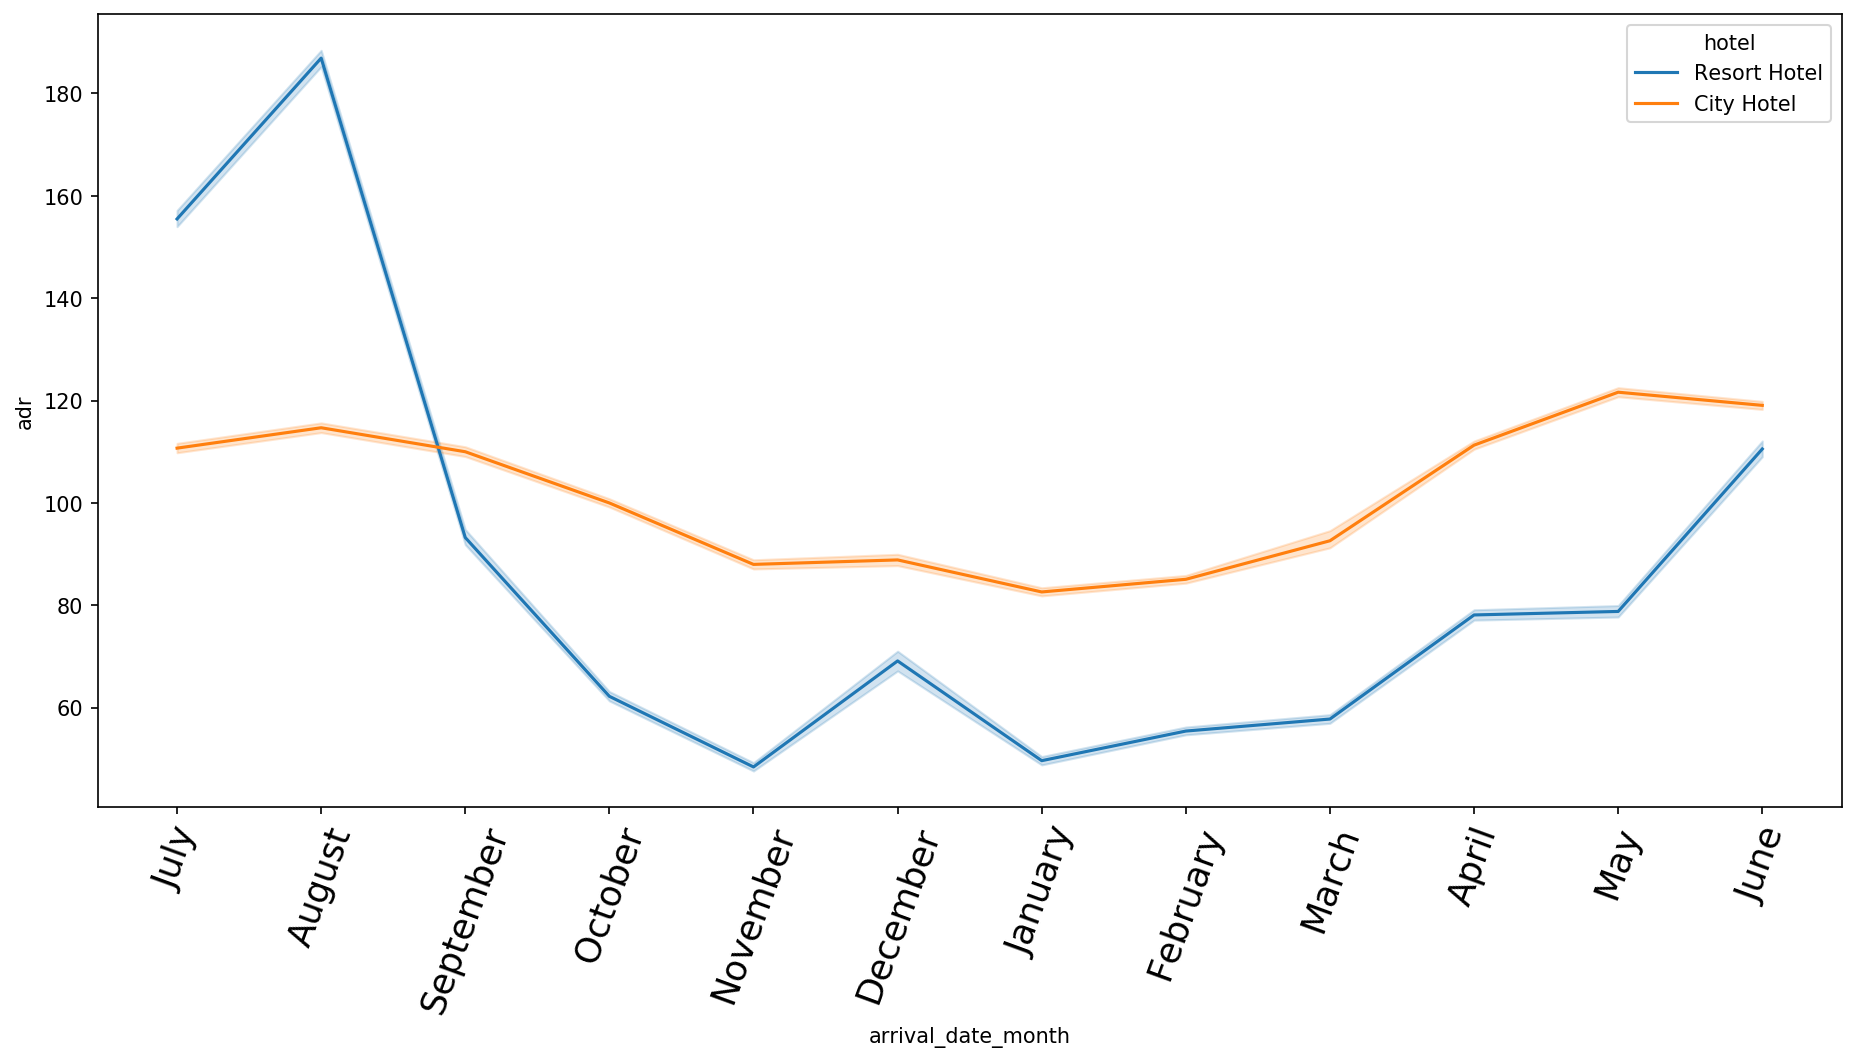

In [57]:
# I will use seaborn to see which hotel has the cheaper 
# rate per month
fig = plt.figure(figsize=(15,7),dpi=150)
sns.lineplot(x='arrival_date_month', y='adr', 
             data=Hotel_Bookings, hue='hotel')
plt.xticks(rotation=70,fontsize=17);
plt.show()

Overall we can see that the city hotel has a steady price that is for the most part higher than the resort hotel. But we can see that the resort hotel has a serious spike in prices during the month of july and august. 

## Cancelations by Lead Time

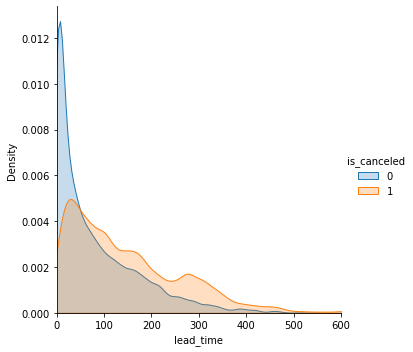

In [58]:
# I will create a density plot that shows the lead time cancelations
(sns.FacetGrid(Hotel_Bookings, hue = 'is_canceled', height = 5, xlim = (0,600))
    .map(sns.kdeplot, 'lead_time', shade = True)
    .add_legend());

The lead time is around 60 where cancelations take place is higher after that point. 

## Hotel Bookings Data Correlation

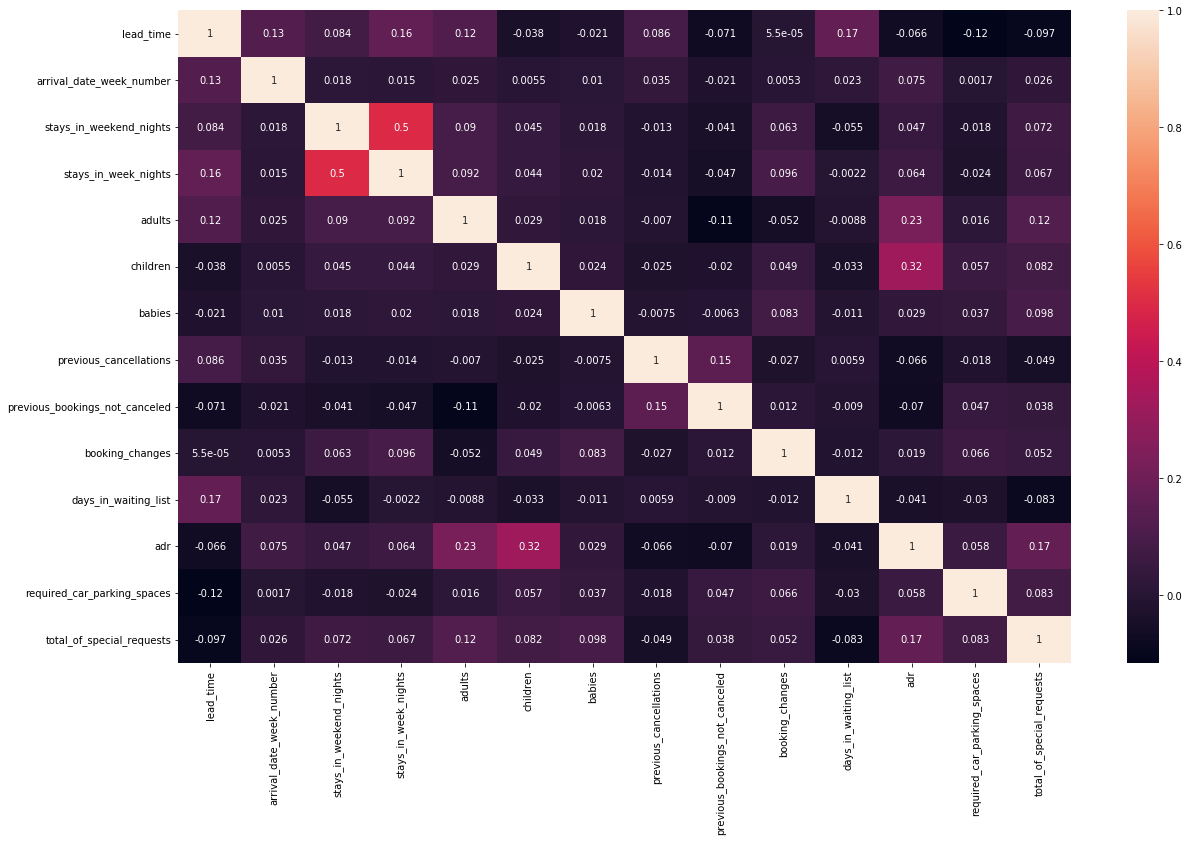

In [59]:
# I will use plot to creat a heatmap to view 
# the correltion between the data.
plt.figure(figsize=(20,12))
sns.heatmap(Hotel_Bookings.corr(),annot=True)

A correlation I have seen that was interesting was .33 correlation between children and ADR - Average Dail Rate

## What is the percent of overall cancelations?

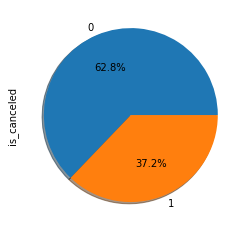

In [63]:
# I will create a pie chart that shows the percent of cancelations
Hotel_Bookings['is_canceled'].value_counts().plot.pie(
    autopct='%1.1f%%',shadow=True)

In [64]:
# View cancelations, check ins and no shows
Hotel_Bookings.groupby("is_canceled")["reservation_status"].value_counts()

is_canceled  reservation_status
0            Check-Out             74605
1            Canceled              42927
             No-Show                1200
Name: reservation_status, dtype: int64

The data shows that out of all the reservations 37.2% of them have been cancelled.

In [65]:
# Iwll use head to view m data frame
Hotel_Bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Arrival_Date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015,2015-07-01


## Data Modeling and Prep

In [66]:
# I will now use isnull and sum to check for missing data
Hotel_Bookings.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [67]:
# I will fisrt drop some uneeded columns
drop_columns = ['reservation_status', 'arrival_date_year', 'assigned_room_type', 
                'country', 'days_in_waiting_list', 'arrival_date_year', 'booking_changes']
Hotel_Bookings.drop(drop_columns, axis = 1, inplace = True)

In [68]:
# I will replace infinite numbers and drop NAs if located as I was having issues with my model
Hotel_Bookings = Hotel_Bookings.replace([np.inf, -np.inf], np.nan)
Hotel_Bookings = Hotel_Bookings.dropna()
Hotel_Bookings = Hotel_Bookings.reset_index()

In [69]:
# Next I will create a numerical and categorical dataframe
categorical = [col for col in Hotel_Bookings.columns if Hotel_Bookings[col].dtype == 'O']
categorical

['hotel',
 'is_canceled',
 'arrival_date_month',
 'arrival_date_day_of_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [70]:
# I will view my categorical data
categorical_data = Hotel_Bookings[categorical]
categorical_data.head()

,hotel,is_canceled,arrival_date_month,arrival_date_day_of_month,meal,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,0,July,1,BB,Direct,Direct,0,C,No Deposit,Transient,7/1/2015
1,Resort Hotel,0,July,1,BB,Direct,Direct,0,C,No Deposit,Transient,7/1/2015
2,Resort Hotel,0,July,1,BB,Direct,Direct,0,A,No Deposit,Transient,7/2/2015
3,Resort Hotel,0,July,1,BB,Corporate,Corporate,0,A,No Deposit,Transient,7/2/2015
4,Resort Hotel,0,July,1,BB,Online TA,TA/TO,0,A,No Deposit,Transient,7/3/2015


In [71]:
# Next I will seperate reservation_status_date into year, month, and day
categorical_data['reservation_status_date'] = pd.to_datetime(categorical_data['reservation_status_date'])
categorical_data['year'] = categorical_data['reservation_status_date'].dt.year
categorical_data['month'] = categorical_data['reservation_status_date'].dt.month
categorical_data['day'] = categorical_data['reservation_status_date'].dt.day
categorical_data.head()

C:\Users\Robyn\anaconda3\envs\dsc650\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Robyn\anaconda3\envs\dsc650\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Robyn\anaconda3\envs\dsc650\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,hotel,is_canceled,arrival_date_month,arrival_date_day_of_month,meal,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,deposit_type,customer_type,reservation_status_date,year,month,day
0,Resort Hotel,0,July,1,BB,Direct,Direct,0,C,No Deposit,Transient,2015-07-01,2015,7,1
1,Resort Hotel,0,July,1,BB,Direct,Direct,0,C,No Deposit,Transient,2015-07-01,2015,7,1
2,Resort Hotel,0,July,1,BB,Direct,Direct,0,A,No Deposit,Transient,2015-07-02,2015,7,2
3,Resort Hotel,0,July,1,BB,Corporate,Corporate,0,A,No Deposit,Transient,2015-07-02,2015,7,2
4,Resort Hotel,0,July,1,BB,Online TA,TA/TO,0,A,No Deposit,Transient,2015-07-03,2015,7,3


In [72]:
# Next I will drop uneeded columns
categorical_data.drop(['reservation_status_date','arrival_date_month','arrival_date_day_of_month',
                       'is_repeated_guest'] , axis = 1, inplace = True)
categorical_data.head()

C:\Users\Robyn\anaconda3\envs\dsc650\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,hotel,is_canceled,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,0,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,0,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,0,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,0,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,0,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [73]:
# Next I will print the values that are unique
for col in categorical_data.columns:
    print(f"{col}: \n{categorical_data[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

is_canceled: 
['0' '1']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B' 'P']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 16 29 19 18  9 13  4 12 26 17 15 10 20 14
 30 28 25 21 27 24 31]



In [74]:
# Next I will encode the categorical variables
categorical_data['distribution_channel'] = categorical_data['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 
                                            'TA/TO': 2, 'Undefined': 3, 'GDS': 4})
categorical_data['reserved_room_type'] = categorical_data['reserved_room_type'].map({'C': 0, 'A': 1, 
                                            'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6, 'L': 7, 'B': 8, 'P':9})
categorical_data['hotel'] = categorical_data['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
categorical_data['deposit_type'] = categorical_data['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})
categorical_data['customer_type'] = categorical_data['customer_type'].map({'Transient': 0, 'Contract': 1, 
                                            'Transient-Party': 2, 'Group': 3})
categorical_data['meal'] = categorical_data['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})
categorical_data['market_segment'] = categorical_data['market_segment'].map({'Direct': 0, 'Corporate': 1, 
                                            'Online TA': 2, 'Offline TA/TO': 3, 'Complementary': 4, 
                                            'Groups': 5, 'Undefined': 6, 'Aviation': 7})
categorical_data['year'] = categorical_data['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

C:\Users\Robyn\anaconda3\envs\dsc650\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Robyn\anaconda3\envs\dsc650\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Robyn\anaconda3\envs\dsc650\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [75]:
# Next I will view my changes
categorical_data.head()

,hotel,is_canceled,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,0,0,0,0,0,0,0,0,7,1
1,0,0,0,0,0,0,0,0,0,7,1
2,0,0,0,0,0,1,0,0,0,7,2
3,0,0,0,1,1,1,0,0,0,7,2
4,0,0,0,2,2,1,0,0,0,7,3


In [76]:
# Next I will create my numerical data frame
numerical_data = Hotel_Bookings.drop(columns = categorical, axis = 1)
numerical_data

,index,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,adr,required_car_parking_spaces,total_of_special_requests,Arrival_Date
0,0,342,27,0,0,2,0.0,0,0,0,0.00,0,0,2015-07-01
1,1,737,27,0,0,2,0.0,0,0,0,0.00,0,0,2015-07-01
2,2,7,27,0,1,1,0.0,0,0,0,75.00,0,0,2015-07-01
3,3,13,27,0,1,1,0.0,0,0,0,75.00,0,0,2015-07-01
4,4,14,27,0,2,2,0.0,0,0,0,98.00,0,1,2015-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118727,119385,23,35,2,5,2,0.0,0,0,0,96.14,0,0,2017-08-30
118728,119386,102,35,2,5,3,0.0,0,0,0,225.43,0,2,2017-08-31
118729,119387,34,35,2,5,2,0.0,0,0,0,157.71,0,4,2017-08-31
118730,119388,109,35,2,5,2,0.0,0,0,0,104.40,0,0,2017-08-31


In [77]:
# Remove arrival date from numerical data
numerical_data.drop(['Arrival_Date'] , axis = 1, inplace = True)

In [78]:
# next I will use var on the numerical data
numerical_data.var()

index                             1.184188e+09
lead_time                         1.143075e+04
arrival_date_week_number          1.846138e+02
stays_in_weekend_nights           9.928137e-01
stays_in_week_nights              3.612958e+00
adults                            3.348436e-01
children                          1.593584e-01
babies                            9.479499e-03
previous_cancellations            7.164284e-01
previous_bookings_not_canceled    2.207290e+00
adr                               2.550951e+03
required_car_parking_spaces       5.966119e-02
total_of_special_requests         6.283597e-01
dtype: float64

In [79]:
# Next I will normalize my numeric variables
numerical_data['lead_time'] = np.log(numerical_data['lead_time'] + 1)
numerical_data['arrival_date_week_number'] = np.log(numerical_data['arrival_date_week_number'] + 1)
numerical_data['adr'] = np.log(numerical_data['adr'] + 1)

C:\Users\Robyn\anaconda3\envs\dsc650\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [80]:
# next I will use var again on the numerical data
numerical_data.var()

index                             1.184188e+09
lead_time                         2.574228e+00
arrival_date_week_number          4.398476e-01
stays_in_weekend_nights           9.928137e-01
stays_in_week_nights              3.612958e+00
adults                            3.348436e-01
children                          1.593584e-01
babies                            9.479499e-03
previous_cancellations            7.164284e-01
previous_bookings_not_canceled    2.207290e+00
adr                               5.372867e-01
required_car_parking_spaces       5.966119e-02
total_of_special_requests         6.283597e-01
dtype: float64

In [81]:
# I will now fill na with the mean for the adr
numerical_data['adr'] = numerical_data['adr'].fillna(value = numerical_data['adr'].mean())

In [82]:
# Convert is_canceled to int
Hotel_Bookings['is_canceled'] = Hotel_Bookings['is_canceled'].astype(float)
Hotel_Bookings['is_canceled'] = Hotel_Bookings['is_canceled'].astype('Int64')

In [83]:
# I will now define my X and Y
X = pd.concat([categorical_data, numerical_data], axis = 1)
y = Hotel_Bookings['is_canceled']

In [84]:
# Set Y to intagers as I was running into an 
# error with my models
y=y.astype('int')

In [85]:
# Now I will view the shape of my X and Y
X.shape, y.shape

((118732, 24), (118732,))

In [86]:
# Import needed Libraries
import sys
sys.path.append('/path/to/sklearn')
!pip install scikit-learn scipy matplotlib numpy

In [87]:
# Import needed libraries
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [88]:
# Next split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35)

In [89]:
X_train.head()

,hotel,is_canceled,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,...,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,adr,required_car_parking_spaces,total_of_special_requests
24562,0,0,0,2,2,1,0,0,2,6,...,2,0,2,0.0,0,0,0,4.414252,0,2
112907,1,0,3,2,2,1,0,0,3,6,...,0,1,2,0.0,0,0,0,4.795791,0,1
12358,0,1,0,1,1,2,0,0,3,5,...,1,3,2,0.0,0,0,0,4.343805,0,0
22983,0,0,2,5,0,2,0,2,2,4,...,2,5,2,0.0,0,0,0,4.253625,0,0
112693,1,0,0,2,2,1,0,0,3,6,...,2,2,2,0.0,0,0,0,4.837075,0,1


## Model Creation for KNN - K-Nearest Neighbors

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [115]:
# I will now set my K-Nearest Neighbors and fit my x and y train
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [116]:
# Next I set my prediction to the x_test and accuracy 
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

In [117]:
# I will create the confusion matrix and classification report
knn_Matrix = confusion_matrix(y_test, knn_pred)
knn_class = classification_report(y_test, knn_pred)
# Print Matrix
knn_Matrix

array([[25523,   547],
       [  985, 14502]], dtype=int64)

In [133]:
# I will now print my Classification Repor for KNN
print(knn_class)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     26070
           1       0.96      0.94      0.95     15487

    accuracy                           0.96     41557
   macro avg       0.96      0.96      0.96     41557
weighted avg       0.96      0.96      0.96     41557



## Model Creation for Random Forest Classifier

In [119]:
# I will now set my Random Forest Classifier and fit my x and y train
rf_class = RandomForestClassifier()
rf_class.fit(X_train, y_train)

RandomForestClassifier()

In [120]:
# Next I set my prediction to the x_test and accuracy 
rf_pred = rf_class.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

In [121]:
# I will create the confusion matrix and classification report
rf_Matrix = confusion_matrix(y_test, rf_pred)
rf_class = classification_report(y_test, rf_pred)
# Print Matrix
rf_Matrix

array([[26070,     0],
       [    0, 15487]], dtype=int64)

In [134]:
# I will now print my Classification Repor for Random Forest
print(rf_class)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26070
           1       1.00      1.00      1.00     15487

    accuracy                           1.00     41557
   macro avg       1.00      1.00      1.00     41557
weighted avg       1.00      1.00      1.00     41557



## Model Creation for Gradient Boosting Classifier

In [123]:
# I will now set my Gradient Boosting Classifier and fit my x and y train
gb_class = GradientBoostingClassifier()
gb_class.fit(X_train, y_train)

GradientBoostingClassifier()

In [124]:
# Next I set my prediction to the x_test and accuracy 
gb_pred = gb_class.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

In [125]:
# I will create the confusion matrix and classification report
gb_Matrix = confusion_matrix(y_test, gb_pred)
gb_class = classification_report(y_test, gb_pred)
# Print Matrix
gb_Matrix

array([[26070,     0],
       [    0, 15487]], dtype=int64)

In [135]:
# I will now print my Classification Repor for Gradient Boosting Classifier
print(gb_class)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26070
           1       1.00      1.00      1.00     15487

    accuracy                           1.00     41557
   macro avg       1.00      1.00      1.00     41557
weighted avg       1.00      1.00      1.00     41557



In [136]:
categorical_data.isnull().sum()

hotel                   0
is_canceled             0
meal                    0
market_segment          0
distribution_channel    0
reserved_room_type      0
deposit_type            0
customer_type           0
year                    0
month                   0
day                     0
dtype: int64

In [137]:
# I will now print the accuracy of each model
print(f"KNN Accuracy: {knn_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Gradient Boosting Classifier Accuracy: {gb_accuracy}")

KNN Accuracy: 0.963134971244315
Random Forest Accuracy: 1.0
Gradient Boosting Classifier Accuracy: 1.0


The models above show that we received a 100% accuracy for both Random Forest Classifier and Gradient Boosting Classifier. While we saw a 96.35% accuracy with K-Nearest Neighbors. Ido have some question on how I received 100% accuracy as I am not set on those finding but I do agree with 96.35% accuracy with K-Nearest Neighbors. 

Overall all the models are great choices for predicting accuracy for cancelations for hotel guests. But the Random Forest Classifier and Gradient Boosting Classifier did show a 100% accuracy which I have never seen before. 